## Importing Necessary Library

In [2]:
#Numerical and Data Analysis
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Extra - To suppress warnings
import warnings
warnings.filterwarnings('ignore')


## Data Loading

In [3]:
loan_data = pd.read_csv(r'C:\Users\ACER\Desktop\loan.csv')

In [4]:
loan_data.shape

(39717, 111)

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Cleaning

<span style="font-size: larger;"><span style="color: blue;">Dropping columns having NA.</span></span>

In [6]:
loan_data.dropna(axis = 1, how = 'all', inplace = True)

In [7]:
loan_data.shape

(39717, 57)

In [8]:
# finding single valued columns
loan_data.columns[loan_data.nunique() == 1]

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

<span style="font-size: larger;"><span style="color: blue;">Dropping single valued columns from dataframe. </span></span>

In [9]:
loan_data = loan_data.drop(loan_data.columns[loan_data.nunique() == 1], axis=1)

In [10]:
loan_data.shape

(39717, 48)

<span style="font-size: larger;"><span style="color: blue;">Now we have to analyse this 48 columns and look for unrelevant. information</span></span>

<span style="font-size: larger;"><span style="color: blue;">url and desc can be removed as they are descriptive values and nothing much can de derived from it</span></span>

In [11]:
loan_data.drop(['url','desc'],axis=1,inplace = True)

In [12]:
loan_data.shape

(39717, 46)

<span style="font-size: larger;"><span style="color: blue;"> Checking missing values percentage </span></span>

In [13]:
100*loan_data.isnull().mean()

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
o

<span style="font-size: larger;"><span style="color: blue;">Deleting columns with maximum missing values(next_pymnt_d, mths_since_last_record, mths_since_last_delinq).</span></span>

In [14]:
loan_data = loan_data.drop(["next_pymnt_d","mths_since_last_record","mths_since_last_delinq"], axis=1)

<span style="font-size: larger;"><span style="color: blue;">Deleting records whose missing percentage is less than 1% </span></span>

In [15]:
loan_data = loan_data.dropna(subset=['last_credit_pull_d', 'last_pymnt_d','revol_util','title'])

In [16]:
100*loan_data.isnull().mean()

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.173744
emp_length                 2.692803
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
title                      0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0

In [17]:
loan_data.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    37217
1.0     1667
2.0        7
Name: count, dtype: int64

In [18]:
#Filling in the missing values with appropriate data
loan_data['pub_rec_bankruptcies'].fillna('0', inplace=True)
loan_data['emp_title'].fillna('Unknown', inplace=True)
loan_data['emp_length'].fillna('Unknown', inplace=True)

<span style="font-size: larger;"><span style="color: blue;">Now the missing values have been handled.</span></span>

In [19]:
100*loan_data.isnull().mean()

id                         0.0
member_id                  0.0
loan_amnt                  0.0
funded_amnt                0.0
funded_amnt_inv            0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
zip_code                   0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_py

## Standardising the data

In [21]:
loan_data.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util          

<span style="font-size: larger;"><span style="color: blue;">convert the ‘int_rate’, ‘revol_util’ and 'term' fields to numerical values and appropriate data type. </span></span>

In [22]:
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%').astype('float') 
loan_data['revol_util'] = loan_data['revol_util'].str.rstrip('%').astype('float') 

In [24]:
loan_data['term'] = loan_data['term'].str.rstrip(' months').astype('int') 

<span style="font-size: larger;"><span style="color: blue;">Finding outliers and managing them.</span></span>

<Axes: ylabel='annual_inc'>

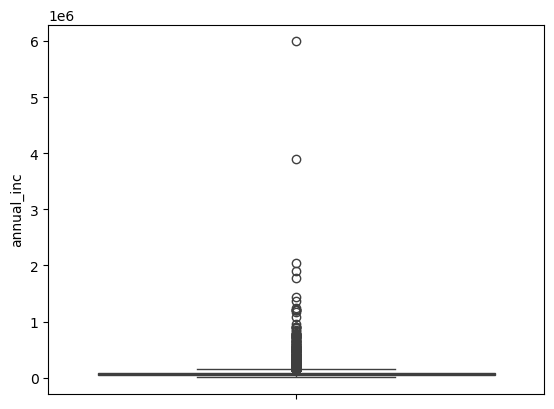

In [26]:
sns.boxplot(loan_data['annual_inc'])


In [27]:
loan_data.annual_inc.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10     30000.00
0.25     40702.00
0.50     59000.00
0.75     82500.00
0.90    116000.00
0.95    142000.00
0.97    166000.00
0.98    188282.88
0.99    235000.00
Name: annual_inc, dtype: float64

In [28]:
#Difference between 0.98 and 0.99 is huge hence dropping the outliers
loan_data=loan_data[loan_data.annual_inc <= loan_data['annual_inc'].quantile(0.98)]


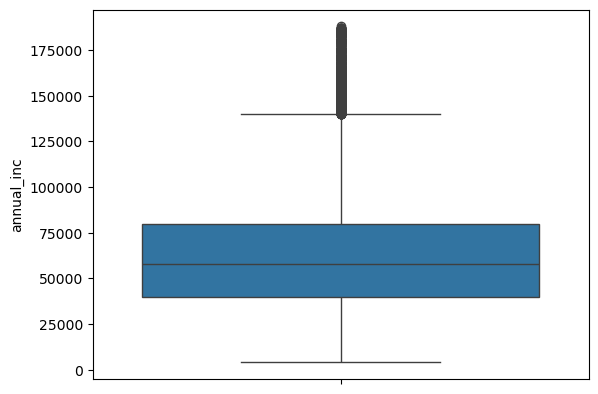

In [29]:
sns.boxplot(loan_data['annual_inc'])
plt.show()

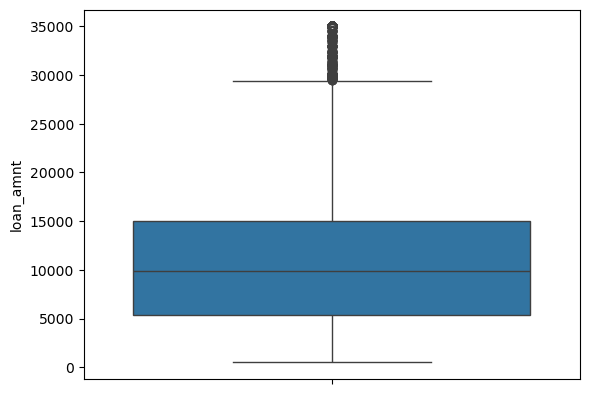

In [30]:
sns.boxplot(data = loan_data['loan_amnt'])
plt.show()

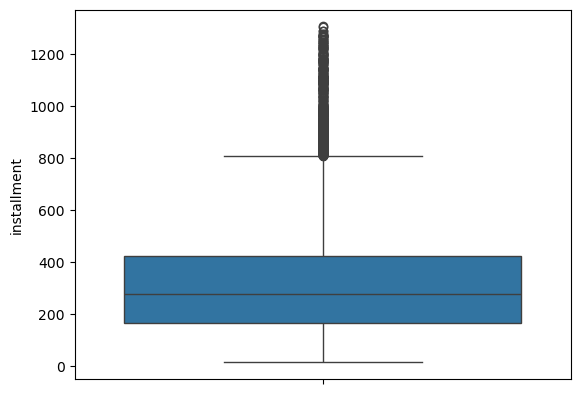

In [31]:
sns.boxplot(loan_data['installment'])
plt.show()

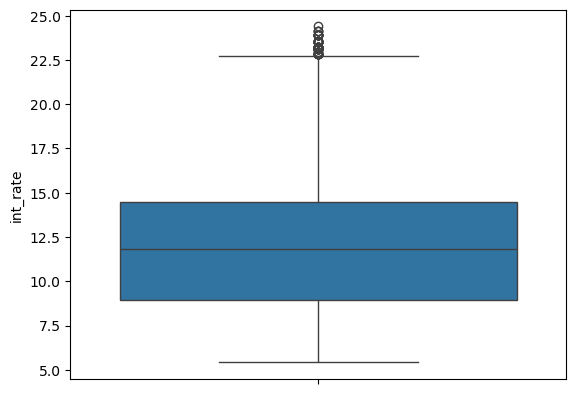

In [32]:
sns.boxplot(loan_data['int_rate'])
plt.show()

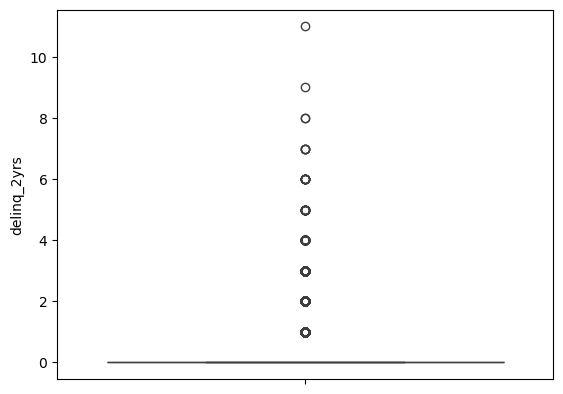

In [33]:
sns.boxplot(loan_data['delinq_2yrs'])
plt.show()

In [34]:
loan_data.delinq_2yrs.quantile([0.10,0.25,0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.10    0.0
0.25    0.0
0.50    0.0
0.75    0.0
0.90    1.0
0.95    1.0
0.97    1.0
0.98    2.0
0.99    2.0
Name: delinq_2yrs, dtype: float64

<span style="font-size: larger;"><span style="color: blue;">Though there are some values far from distribution, the distribution is pretty continous so there is no need to remove outliers for int_rate, installment ,loan_amnt and delinq_2yrs.</span></span>

###### Filtering data for loan_status = ' Charged Off' as the objective is to find patterns for the customers who default.

In [35]:
loan_data = loan_data[loan_data['loan_status'] == 'Charged Off']

# Univariate Analysis

## Categorical variable - unordered

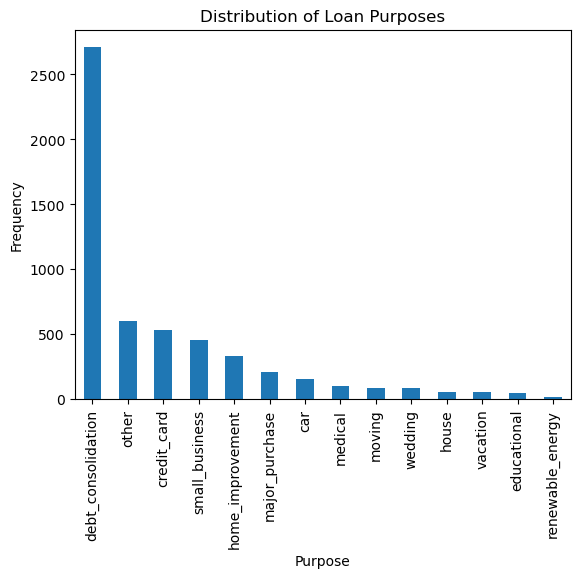

In [36]:
purpose_counts = loan_data['purpose'].value_counts()

# Create a bar plot
purpose_counts.plot.bar()

# Add title and labels
plt.title('Distribution of Loan Purposes')
plt.xlabel('Purpose')
plt.ylabel('Frequency')

# Display the plot
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Inference: Majority of loans are taken for debt_consolidation followed by other and credit card</span></span>

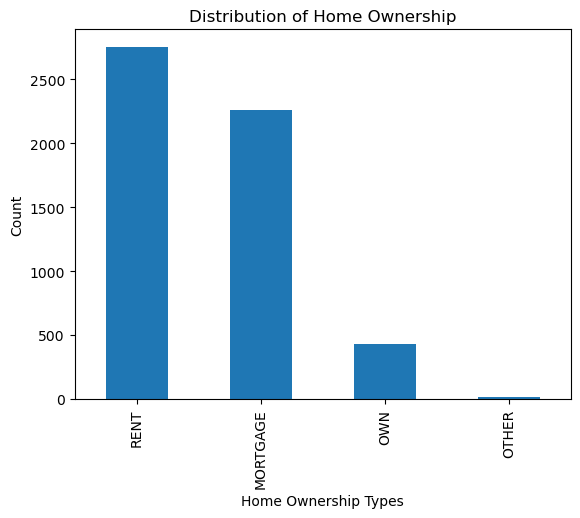

In [38]:
home_ownership_counts = loan_data['home_ownership'].value_counts()

# Create a bar plot
home_ownership_counts.plot.bar()

# Add title and labels
plt.title('Distribution of Home Ownership')
plt.xlabel('Home Ownership Types')
plt.ylabel('Count')

# Display the plot
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: People with own house have taken less loans compared to people staying in rented or mortgage house.</span></span>

## Categorical variable - ordered

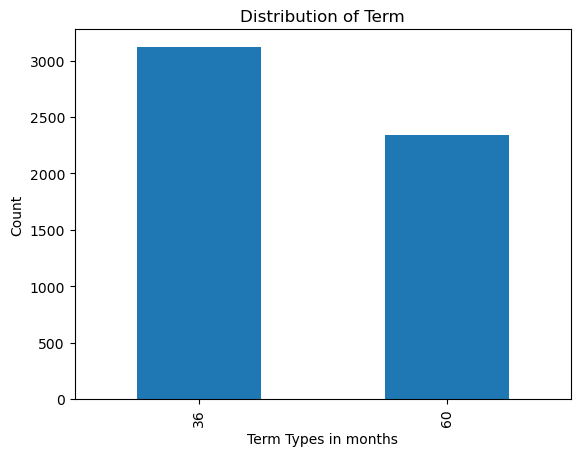

In [39]:
term_counts = loan_data['term'].value_counts()

# Create a bar plot
term_counts.plot.bar()

# Add title and labels
plt.title('Distribution of Term')
plt.xlabel('Term Types in months')
plt.ylabel('Count')

# Display the plot
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: 36 month term loans have more default rate than 60 months</span></span>

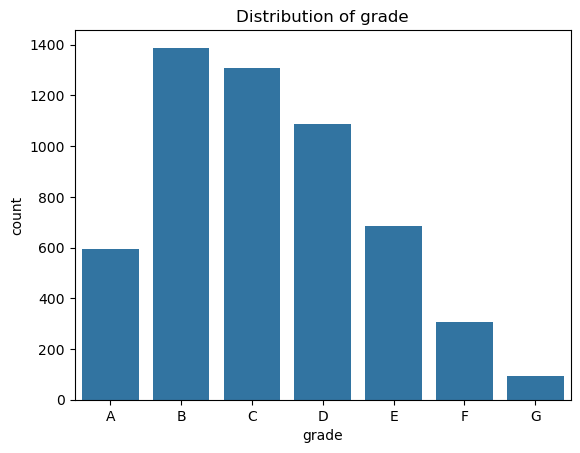

In [40]:
gradeC = loan_data['grade'].value_counts()
sns.barplot(gradeC,order='ABCDEFG')
plt.title('Distribution of grade')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Loans with a B credit grade have higher default rates, followed by grades C and D.</span></span>

# Univariate - Numerical Variable Analysis

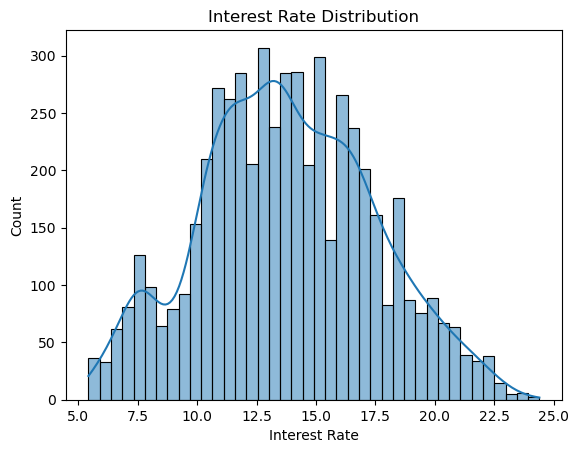

In [42]:
sns.histplot(loan_data['int_rate'], bins=40, kde=True)

# Add title and labels
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.ylabel('Count')

# Display the plot
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Most of the defaulted loans have interest rate of 12.5 and bulk of the loans have interest rate distribution between 10 to 15.</span></span>

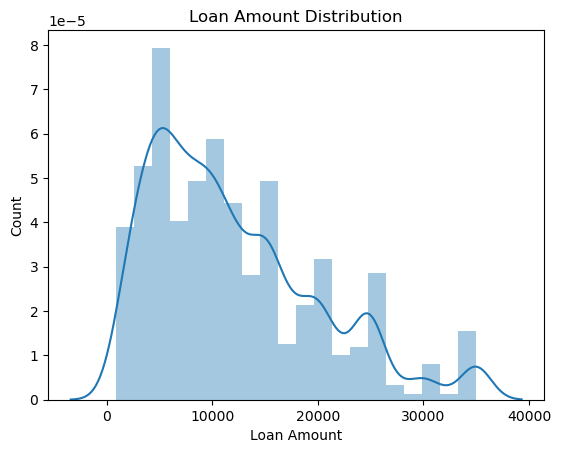

In [43]:
sns.reset_defaults()
sns.distplot(loan_data['loan_amnt'], bins = 20)
# Add title and labels
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

# Display the plot
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Most of the defaulted loan amounts are around 5000 and bulk of the loans have distribution between 5000 to 10000.</span></span>

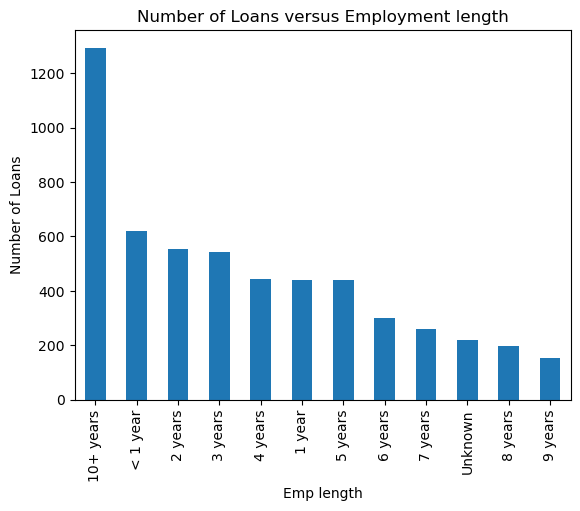

In [44]:
loan_data['emp_length'].value_counts().plot.bar()
plt.title('Number of Loans versus Employment length')
plt.xlabel('Emp length')
plt.ylabel('Number of Loans')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Majority of the defaulted loans have been taken by people with 10+ years of employment.</span></span>

## Segmented Univariate Analysis

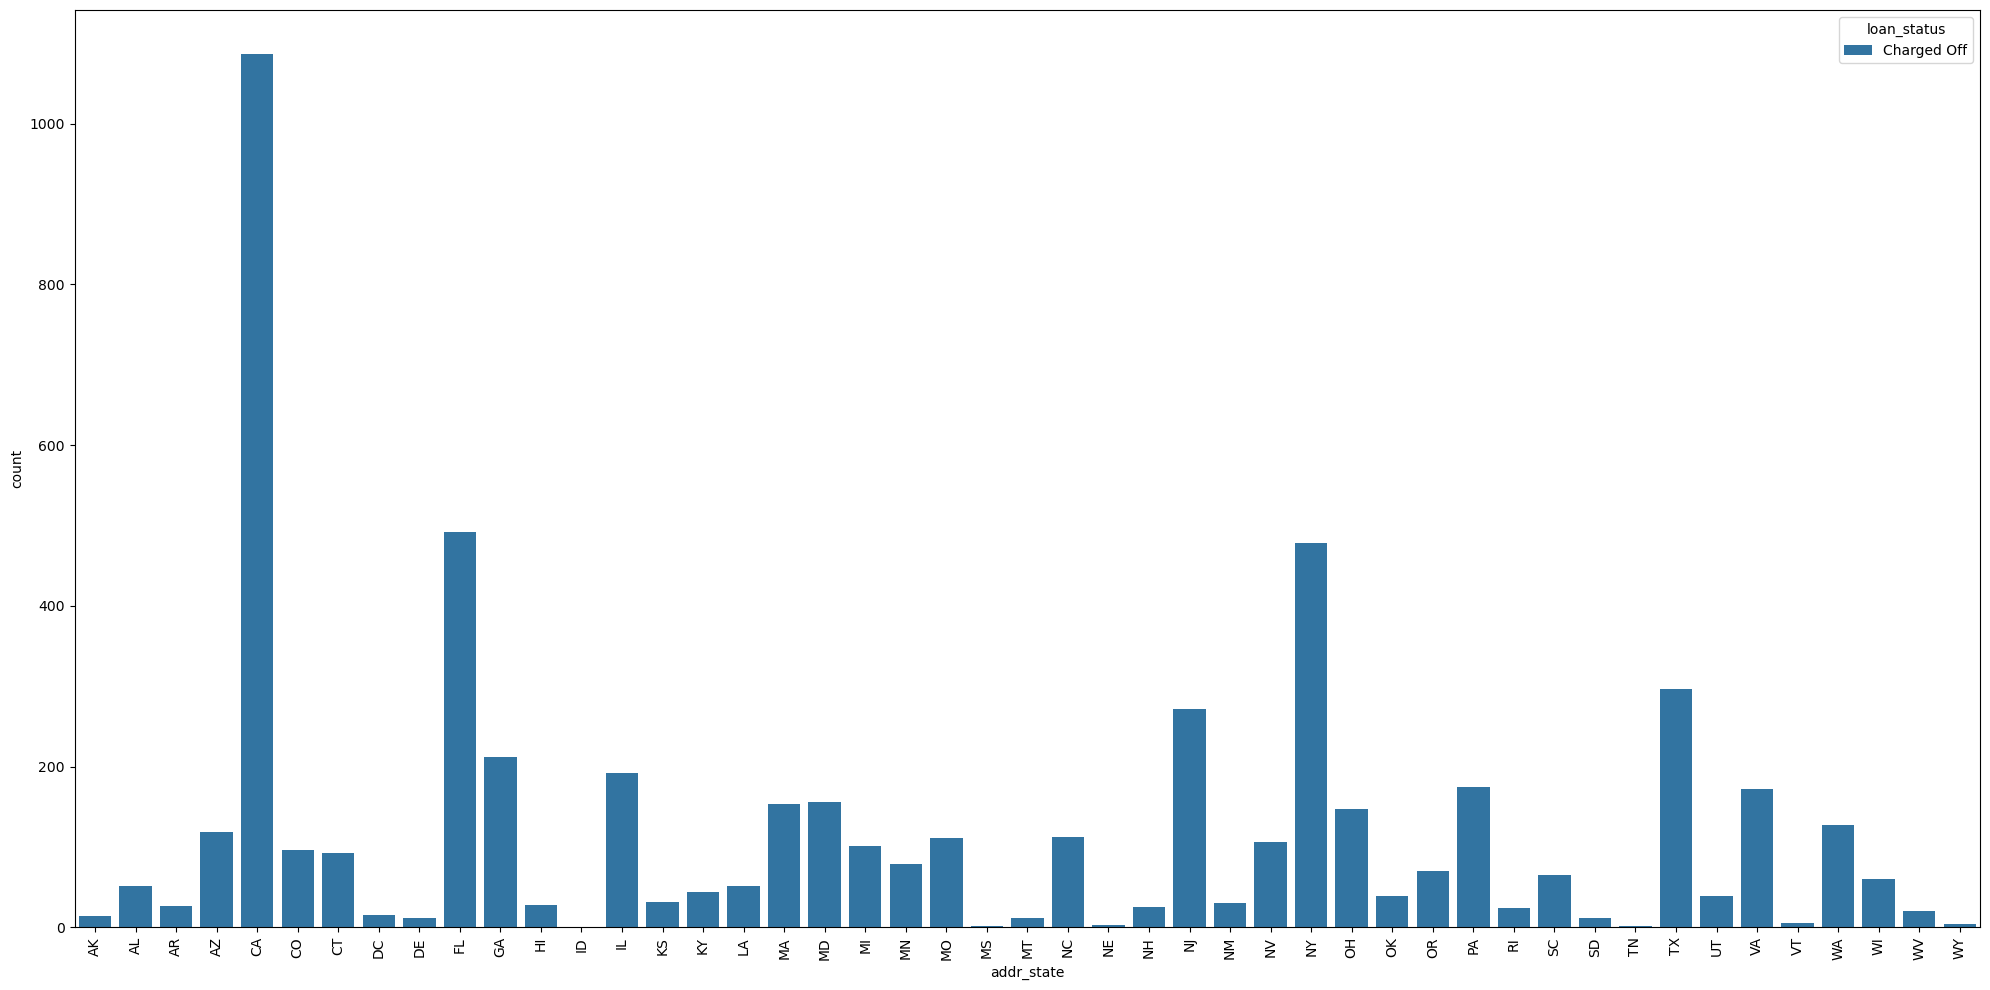

In [45]:
agg_data = loan_data.groupby(['addr_state', 'loan_status'])['loan_status'].count().reset_index(name='count')


# Create a larger figure size to accommodate the many states
plt.figure(figsize=(20, 10))

# Create a bar plot
sns.barplot(x='addr_state', y='count', hue='loan_status', data=agg_data)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

<span style="font-size: larger;"><span style="color: blue;"> Observation : More number of loan defaults are observed from CA followed by FL and NY. </span></span>

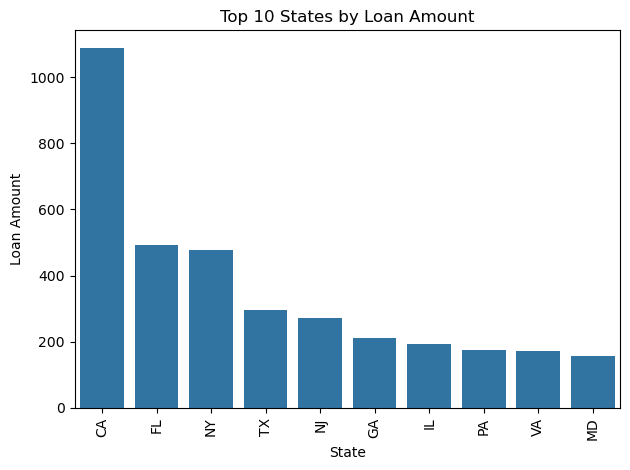

In [46]:
# Group by 'addr_state' and calculate the mean loan amount, then reset the index
agg_data = loan_data.groupby('addr_state')['loan_amnt'].count().reset_index(name='count')

# Sort the data by 'mean_count' in descending order and select the top 10
top_states = agg_data.sort_values(by='count', ascending=False).head(10)

# Create a bar plot for the top 10 states
sns.barplot(x='addr_state', y='count', data=top_states)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Top 10 States by Loan Amount')
plt.xlabel('State')
plt.ylabel('Loan Amount')

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Maximum defaulted loans have been availed by CA followed by FL and NY.</span></span>

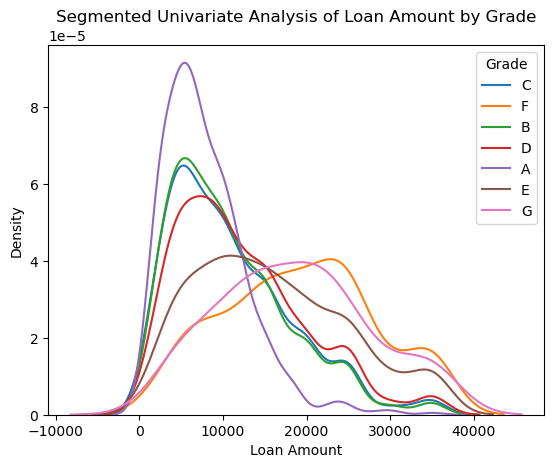

In [47]:
# First, let's segment 'loan_amnt' by 'grade'
segmented_data = loan_data.groupby('grade')['loan_amnt']

# Now, let's plot the distribution of 'loan_amnt' for each 'grade'

for grade in loan_data['grade'].unique():
    sns.distplot(segmented_data.get_group(grade), hist=False, label=grade)

plt.title('Segmented Univariate Analysis of Loan Amount by Grade')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend(title='Grade')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation:  Defaulted loans of grade A, B and C have same first peak. Interestingly there is a slight peak observed for all grade loans around 25000. </span></span>

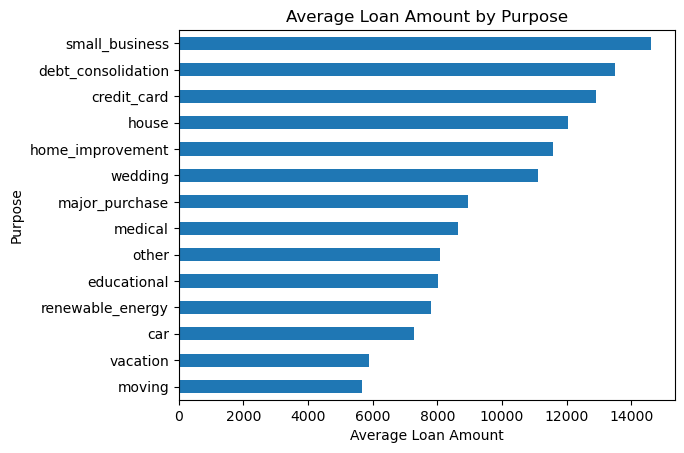

In [48]:
loan_data.groupby('purpose')['loan_amnt'].mean().sort_values().plot(kind='barh')
plt.title('Average Loan Amount by Purpose')
plt.xlabel('Average Loan Amount')
plt.ylabel('Purpose')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Average defaulted loans amount rate for small business and debt consolidation is higher than others.</span></span>

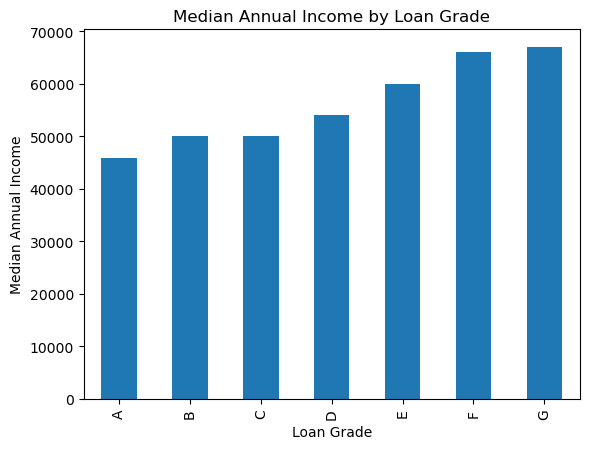

In [49]:
loan_data.groupby('grade')['annual_inc'].median().plot(kind='bar')
plt.title('Median Annual Income by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Median Annual Income')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: People with higher incomes have defaulted loans in grade G and F.</span></span>

## Bivariate Analysis on continuous variable

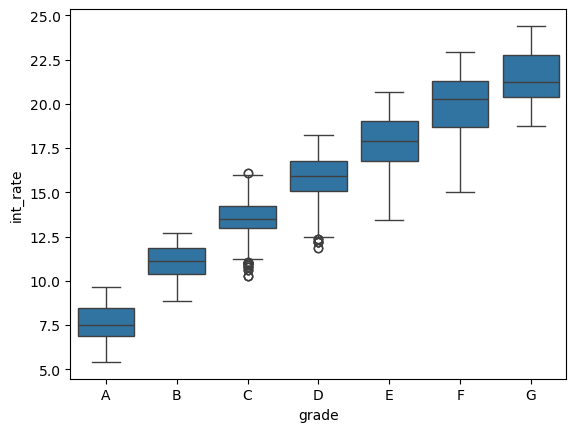

In [50]:
sns.boxplot(y='int_rate',x='grade',data=loan_data,order='ABCDEFG')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Grade A loans have lowest interest rates and grade G loans have highest interest rates.</span></span>

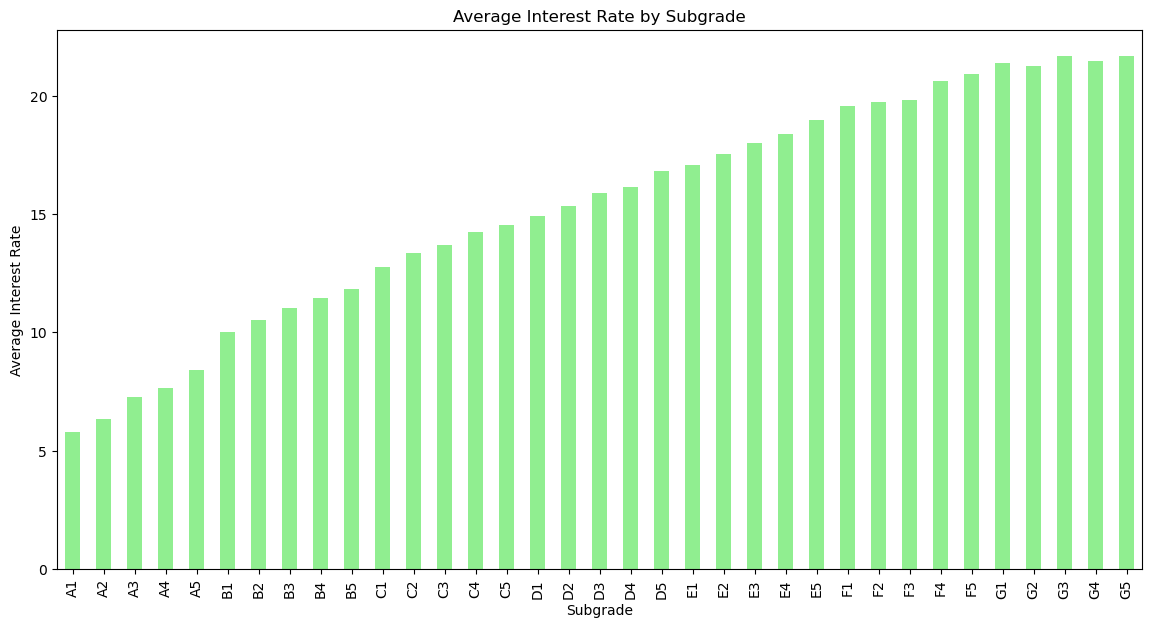

In [51]:
# Analyze the average interest rate by subgrade
avg_int_rate_by_subgrade = loan_data.groupby('sub_grade')['int_rate'].mean()
# Plotting the average interest rate by subgrade
plt.figure(figsize=(14, 7))
avg_int_rate_by_subgrade.plot(kind='bar', color='lightgreen')
plt.title('Average Interest Rate by Subgrade')
plt.xlabel('Subgrade')
plt.ylabel('Average Interest Rate')
plt.show()

<span style="font-size: larger;"><span style="color: blue;"> Observation: A1 sub grade people have low interest rate and G3, G5 sub grade have high interest rate. </span></span>

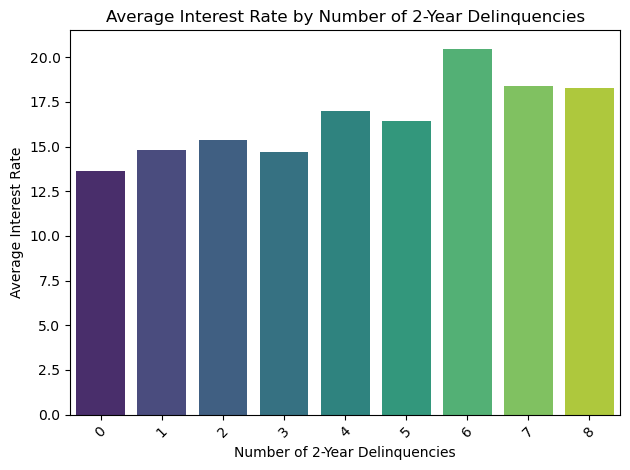

In [52]:
# Analyze the average interest rate by number of delinquencies
avg_int_rate_by_delinq = loan_data.groupby('delinq_2yrs')['int_rate'].mean().reset_index()
# Plotting the average interest rate by number of delinquencies
sns.barplot(x='delinq_2yrs', y='int_rate', data=avg_int_rate_by_delinq, palette='viridis')
plt.title('Average Interest Rate by Number of 2-Year Delinquencies')
plt.xlabel('Number of 2-Year Delinquencies')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size: larger;"><span style="color: blue;"> For 6 number of 2-year Delinquencies has higher interest rate. </span></span>

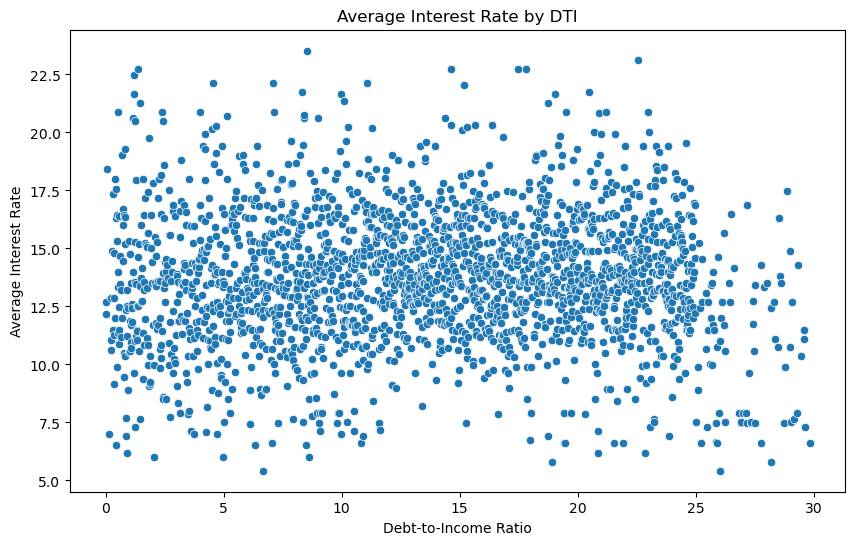

In [54]:
# Analyze the average interest rate by DTI
avg_int_rate_by_dti = loan_data.groupby('dti')['int_rate'].mean().reset_index()

# Plotting the average interest rate by DTI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='dti', y='int_rate', data=avg_int_rate_by_dti)
plt.title('Average Interest Rate by DTI')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Average Interest Rate')
plt.show()


<span style="font-size: larger;"><span style="color: blue;">Observation: There is a upward trend (positive correlation) between DTI and interest rate</span></span> 

In [55]:
# Analyze the average interest rate and loan amount by number of public record bankruptcies
analysis_by_bankruptcy = loan_data.groupby('pub_rec_bankruptcies').agg({
    'int_rate': 'mean',
    'loan_amnt': 'mean'
}).reset_index()

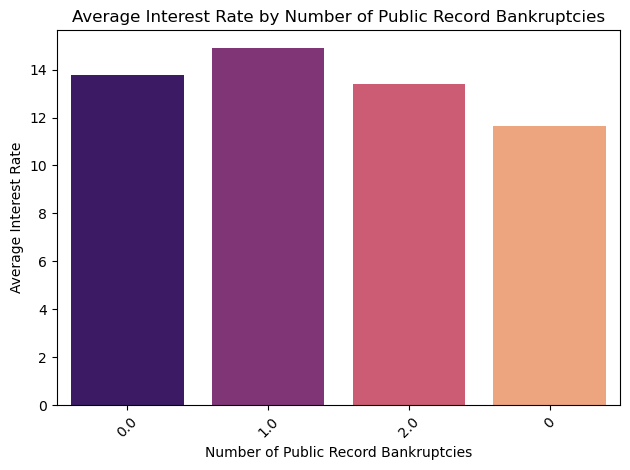

In [56]:
# Plotting the average interest rate by number of public record bankruptcies
#plt.figure(figsize=(10, 6))
sns.barplot(x='pub_rec_bankruptcies', y='int_rate', data=analysis_by_bankruptcy, palette='magma')
plt.title('Average Interest Rate by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Average Interest Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size: larger;"><span style="color: blue;">If there are public record bankruptcies, the interest rate is typically higher.</span></span>

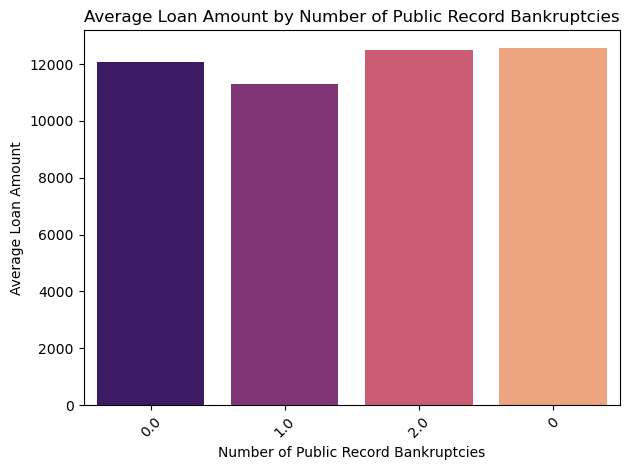

In [57]:
# Plotting the average loan amount by number of public record bankruptcies
sns.barplot(x='pub_rec_bankruptcies', y='loan_amnt', data=analysis_by_bankruptcy, palette='magma')
plt.title('Average Loan Amount by Number of Public Record Bankruptcies')
plt.xlabel('Number of Public Record Bankruptcies')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<span style="font-size: larger;"><span style="color: blue;">The highest loan amount availed, which is 12,000, is most commonly taken by individuals who have two public record bankruptcies.</span></span>

## Bivariate Analysis on Categorical variables

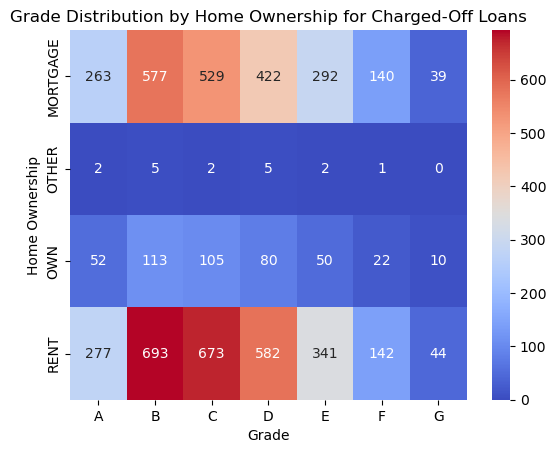

In [59]:
# Crosstab to see the count of each combination of home ownership and grade
ctab = pd.crosstab(loan_data['home_ownership'], loan_data['grade'])

# Plotting the crosstab
sns.heatmap(ctab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Grade Distribution by Home Ownership for Charged-Off Loans')
plt.xlabel('Grade')
plt.ylabel('Home Ownership')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">The majority of individuals who have defaulted on their loans are those who either rent their homes or have a mortgage, and they typically fall within the B, C, and D credit grades.</span></span>

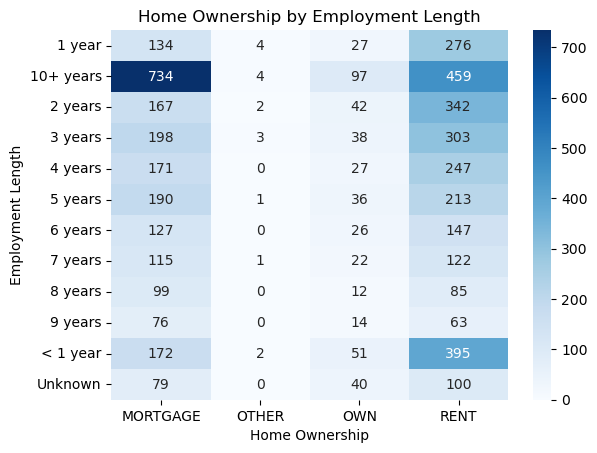

In [60]:
# Crosstab to see the count of each combination of employment length and home ownership
ctab_emp_home = pd.crosstab(loan_data['emp_length'], loan_data['home_ownership'])

# Plotting the crosstab
#plt.figure(figsize=(12, 8))
sns.heatmap(ctab_emp_home, annot=True, fmt='d', cmap='Blues')
plt.title('Home Ownership by Employment Length')
plt.xlabel('Home Ownership')
plt.ylabel('Employment Length')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Individuals with an employment length of over 10 years predominantly live in rented homes or have mortgages, and they tend to have a higher default rate.
</span></span>

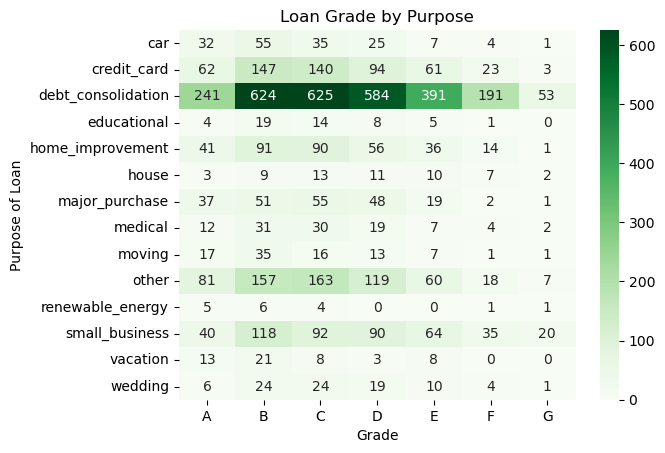

In [61]:
# Crosstab to see the count of each combination of loan purpose and grade
ctab_purpose_grade = pd.crosstab(loan_data['purpose'], loan_data['grade'])

# Plotting the crosstab
#plt.figure(figsize=(12, 8))
sns.heatmap(ctab_purpose_grade, annot=True, fmt='d', cmap='Greens')
plt.title('Loan Grade by Purpose')
plt.xlabel('Grade')
plt.ylabel('Purpose of Loan')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">The majority of loans that have defaulted were taken out for debt consolidation and are categorized within the B, C, D, and E credit grades.</span></span>

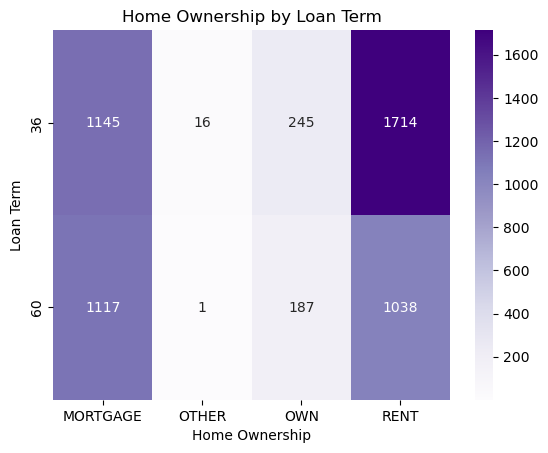

In [62]:
# Crosstab to see the count of each combination of loan term and home ownership
ctab_term_home = pd.crosstab(loan_data['term'], loan_data['home_ownership'])

# Plotting the crosstab
sns.heatmap(ctab_term_home, annot=True, fmt='d', cmap='Purples')
plt.title('Home Ownership by Loan Term')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Term')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Renters tend to default more on shorter-term loans, while mortgage show a similar default rate across both short and long-term loans. </span></span>

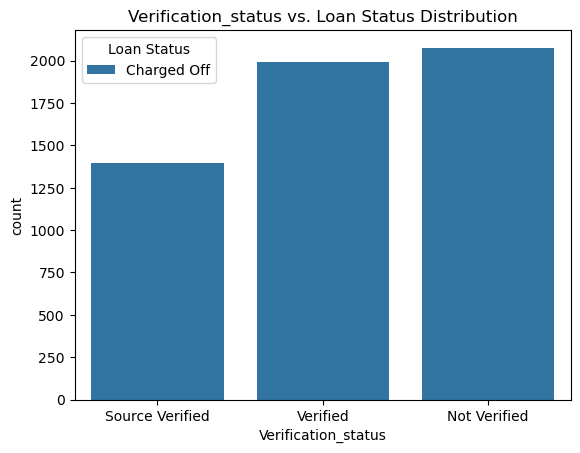

In [63]:

sns.countplot(x='verification_status', hue='loan_status', data=loan_data)

plt.title('Verification_status vs. Loan Status Distribution')
plt.xlabel('Verification_status')
plt.ylabel('count')
plt.legend(title='Loan Status')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: Not verified have defaulted more compared to verified and source verified people.</span></span>

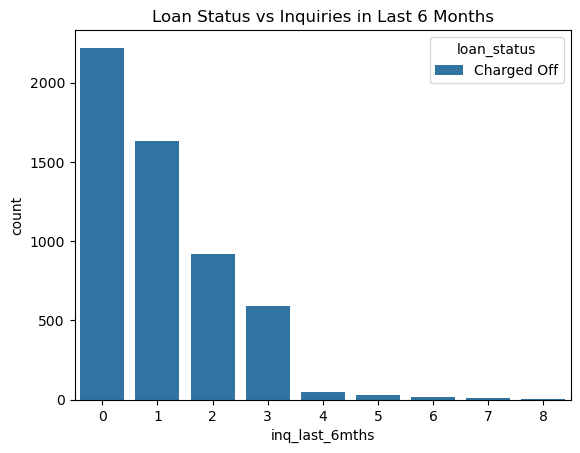

In [64]:
sns.countplot(x='inq_last_6mths', hue='loan_status', data=loan_data)
plt.title('Loan Status vs Inquiries in Last 6 Months')
plt.show()


<span style="font-size: larger;"><span style="color: blue;">Observation: A majority of borrowers who did default on their loans had zero inquiry in the last 6 months.</span></span>

## Multivariate Analysis

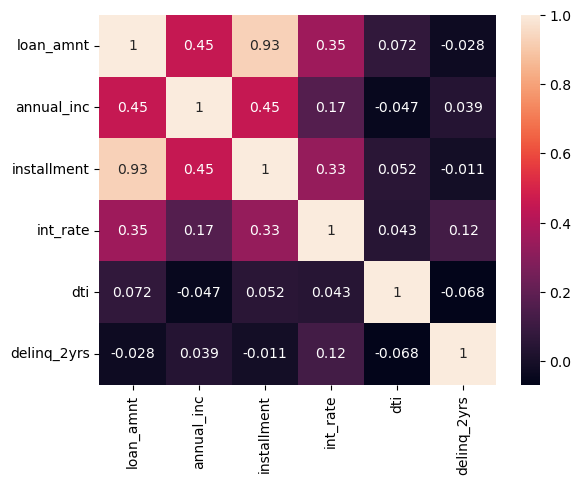

In [65]:
num_cols = ['loan_amnt', 'annual_inc', 'installment', 'int_rate', 'dti','delinq_2yrs']
sns.heatmap(loan_data[num_cols].corr(),annot=True)
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: <br> 1) Annual Income & Loan Amount (0.45): There is a moderate positive correlation here. This indicates that borrowers with higher annual incomes tend to take out larger loan amounts, which could be due to their ability to afford larger repayments.<br> 2) The loan amount(0.35) increases, there is a tendency for the interest rate to increase as well, but it’s not a strong or perfect relationship.</span></span> 

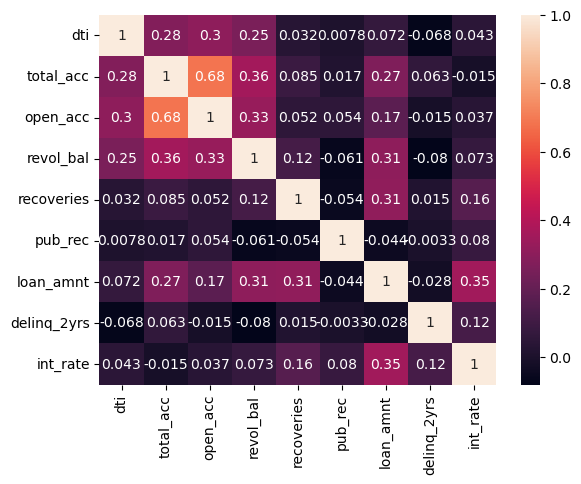

In [66]:
num_cols = ['dti','total_acc','open_acc','revol_bal','recoveries','pub_rec','loan_amnt','delinq_2yrs','int_rate']
sns.heatmap(loan_data[num_cols].corr(),annot=True)
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Observation: The strongest correlation is between Total_Acc and Open_Acc, which is logical given that open accounts are part of the total accounts. The other correlations are moderate to weak, indicating that while there are tendencies for these variables to move together, they are not strongly predictive of each other.</span></span> 

# Derived Metrics

In [67]:
#extracting month from issue_d
loan_data['issue_m'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.strftime('%B')

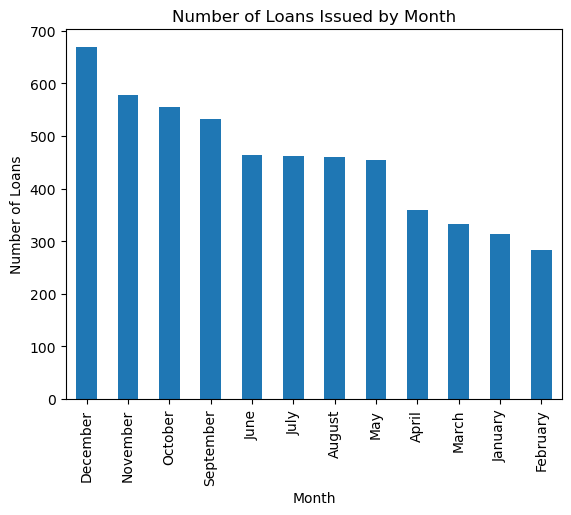

In [68]:
loan_data['issue_m'].value_counts().plot.bar()
plt.title('Number of Loans Issued by Month')
plt.xlabel('Month')
plt.ylabel('Number of Loans')
plt.show()

<span style="font-size: larger;"><span style="color: blue;">Number of loans issued in December followed by November, October and September have defaulted more.</span></span>